<a href="https://colab.research.google.com/github/juanpajedrez/pytorch_learning/blob/main/01_pytorch_workflow_exercises_sols.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. PyTorch Workflow Exercise Template

The following is a template for the PyTorch workflow exercises.

It's only starter code and it's your job to fill in the blanks.

Because of the flexibility of PyTorch, there may be more than one way to answer the question.

Don't worry about trying to be *right* just try writing code that suffices the question.

You can see one form of [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) (but try the exercises below yourself first!).

In [48]:
# Import necessary libraries
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#Check python version
torch.__version__

'2.5.1+cu124'

In [49]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [50]:
if device == "cuda":
  !nvidia-smi

Tue Feb  4 19:16:24 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   65C    P0             31W /   70W |     120MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## 1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).
  * Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total.
  * Split the data into 80% training, 20% testing.
  * Plot the training and testing data so it becomes visual.

Your output of the below cell should look something like:
```
Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])
y: tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
        0.9270])
```

Of course the numbers in `X` and `y` may be different but ideally they're created using the linear regression formula.

In [51]:
# Create the data parameters
weight = 0.3
bias = 0.9

# Make X and y using linear regression feature
X = torch.arange(0, 1, 1/100).unsqueeze(dim = 1)
y = weight * X + bias

print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")

Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]])
y: tensor([[0.9000],
        [0.9030],
        [0.9060],
        [0.9090],
        [0.9120],
        [0.9150],
        [0.9180],
        [0.9210],
        [0.9240],
        [0.9270]])


In [52]:
# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2)

In [53]:
# Print the dimensions and some val
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

torch.Size([80, 1])
torch.Size([80, 1])
torch.Size([20, 1])
torch.Size([20, 1])


In [54]:
from typing import Union

### Lets create a function that plots them :) would be useful later
def plot_predictions(X_train: torch.Tensor,
                     y_train: torch.Tensor,
                     X_test: torch.Tensor,
                     y_test: torch.Tensor,
                     predictions: Union[None, torch.Tensor]):
  # Plot the training and testing data
  plt.figure(figsize=(20, 10))
  plt.scatter(X_train, y_train, label = "Training data")
  plt.scatter(X_test, y_test, label = "Testing data")

  if predictions is not None:
    plt.scatter(X_test, predictions, label = "Predictions")

  plt.legend(loc = "upper left")
  plt.show()

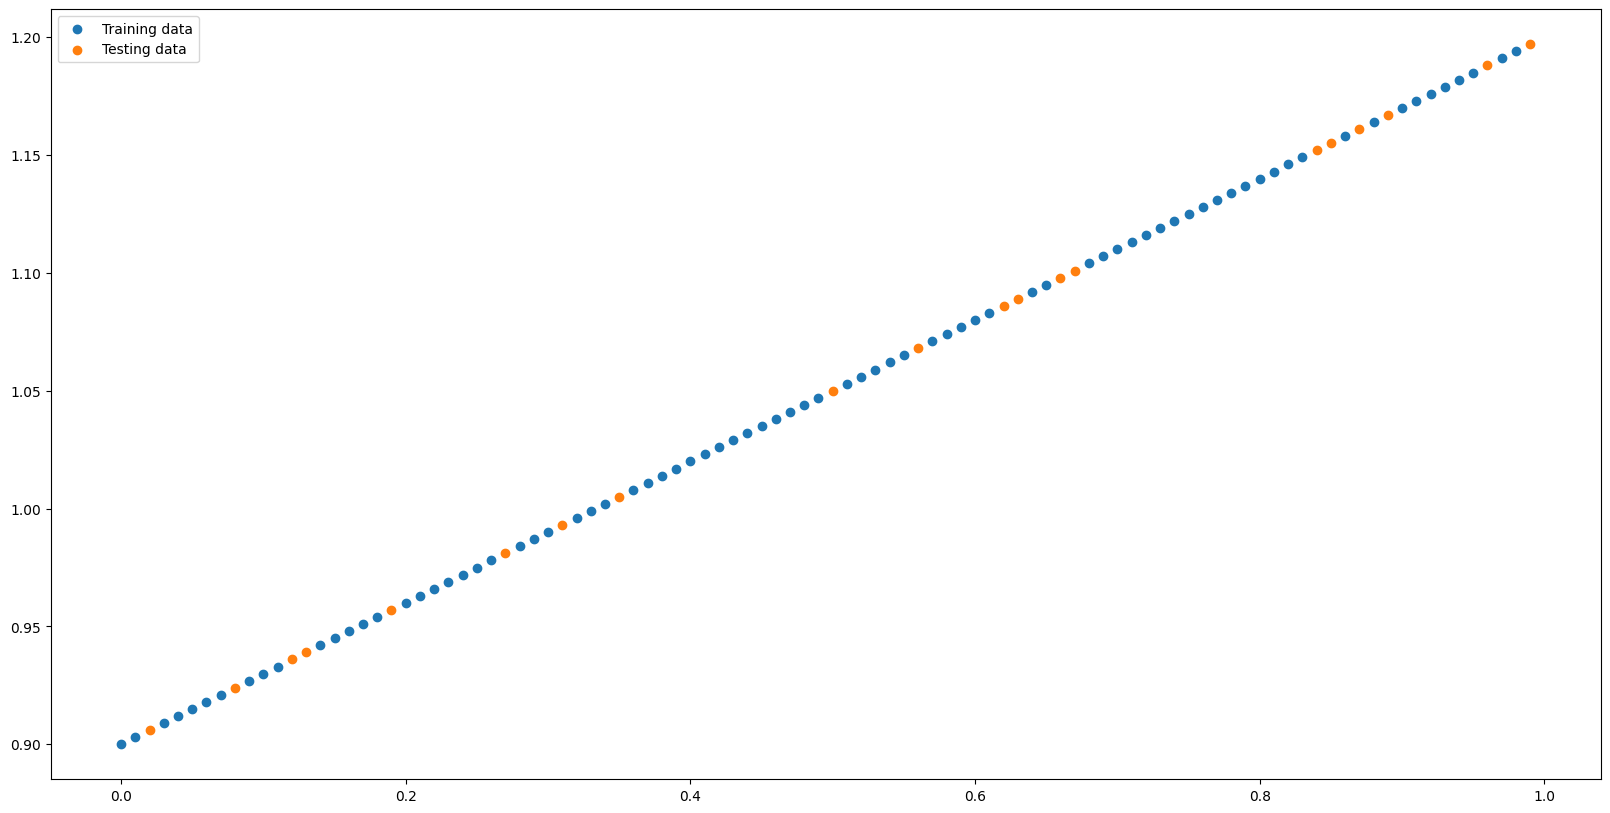

In [55]:
plot_predictions(X_train, y_train, X_test, y_test, None)

## 2. Build a PyTorch model by subclassing `nn.Module`.
  * Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`.
  * Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1.
  * Once you've constructed the model, make an instance of it and check its `state_dict()`.
  * **Note:** If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.

In [56]:
import torch.nn as nn

# Create PyTorch linear regression model by subclassing nn.Module
class LinearReg1(nn.Module):
  '''
  Class that would mimic a linear regression model
  this one uses the parameter way
  '''
  def __init__(self) -> None:
     super().__init__()
     self.weight = nn.Parameter(torch.randn(1,
                                requires_grad=True,
                                dtype=torch.float))
     self.bias = nn.Parameter(torch.randn(1,
                              requires_grad=True,
                              dtype=torch.float))

  def forward(self, x:torch.Tensor):
    '''Tensor must be of shape (N X 1)'''
    return self.weight * x + self.bias

class LinearReg2(nn.Module):
  '''
  Class that would mimic a linear regression model
  this one uses the nn.Linear layer
  '''
  def __init__(self) -> None:
     super().__init__()
     self.linear = nn.Linear(in_features=1,
                             out_features=1,
                             dtype=torch.float)

  def forward(self, x:torch.Tensor):
    '''Tensor must be of shape (N X 1)'''
    return self.linear(x)

In [57]:
# Instantiate the model and put it to the target device
model = LinearReg1()
#model = LinearReg2()

# Now lets set it to device
model.to(device)

LinearReg1()

In [58]:
[x for x in model.parameters()]
next(model.parameters()).device

device(type='cuda', index=0)

## 3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively.
  * Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
  * Write a training loop to perform the appropriate training steps for 300 epochs.
  * The training loop should test the model on the test dataset every 20 epochs.

In [59]:
# Create the loss function and optimizer
lr = 0.01

#Set up the loss function
loss_fn = nn.L1Loss()

#Set up the optimizer
optim = torch.optim.SGD(params=model.parameters(), lr=lr)


In [60]:
# Training loop

# Train model for 300 epochs
torch.manual_seed(42)
epochs = 600

# Send data to target device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  ### Training

  # Put model in train mode
  model.train()

  # 1. Forward pass
  y_pred = model(X_train)

  # 2. Calculate loss
  loss = loss_fn(y_pred, y_train)

  # 3. Zero gradients
  optim.zero_grad()

  # 4. Backpropagation
  loss.backward()

  # 5. Step the optimizer
  optim.step()


  ### Perform testing every 20 epochs
  if epoch % 20 == 0:

    # Put model in evaluation mode and setup inference context
      model.eval()

      # 1. Forward pass
      with torch.inference_mode():
        test_pred = model(X_test)

        # 2. Calculate test loss
        test_loss = loss_fn(test_pred, y_test)

      # Print out what's happening
      print(f"Epoch: {epoch} | Train loss: {loss:.3f} | Test loss: {test_loss:.3f}")

Epoch: 0 | Train loss: 0.753 | Test loss: 0.739
Epoch: 20 | Train loss: 0.506 | Test loss: 0.488
Epoch: 40 | Train loss: 0.258 | Test loss: 0.237
Epoch: 60 | Train loss: 0.086 | Test loss: 0.085
Epoch: 80 | Train loss: 0.069 | Test loss: 0.076
Epoch: 100 | Train loss: 0.060 | Test loss: 0.066
Epoch: 120 | Train loss: 0.050 | Test loss: 0.056
Epoch: 140 | Train loss: 0.041 | Test loss: 0.045
Epoch: 160 | Train loss: 0.031 | Test loss: 0.035
Epoch: 180 | Train loss: 0.022 | Test loss: 0.024
Epoch: 200 | Train loss: 0.013 | Test loss: 0.014
Epoch: 220 | Train loss: 0.003 | Test loss: 0.003
Epoch: 240 | Train loss: 0.003 | Test loss: 0.010
Epoch: 260 | Train loss: 0.003 | Test loss: 0.010
Epoch: 280 | Train loss: 0.003 | Test loss: 0.010
Epoch: 300 | Train loss: 0.003 | Test loss: 0.010
Epoch: 320 | Train loss: 0.003 | Test loss: 0.010
Epoch: 340 | Train loss: 0.003 | Test loss: 0.010
Epoch: 360 | Train loss: 0.003 | Test loss: 0.010
Epoch: 380 | Train loss: 0.003 | Test loss: 0.010
Epoch:

## 4. Make predictions with the trained model on the test data.
  * Visualize these predictions against the original training and testing data (**note:** you may need to make sure the predictions are *not* on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [61]:
# Make predictions with the model
model.eval()

# Make predictions on the test data
with torch.inference_mode():
  y_preds = model(X_test)

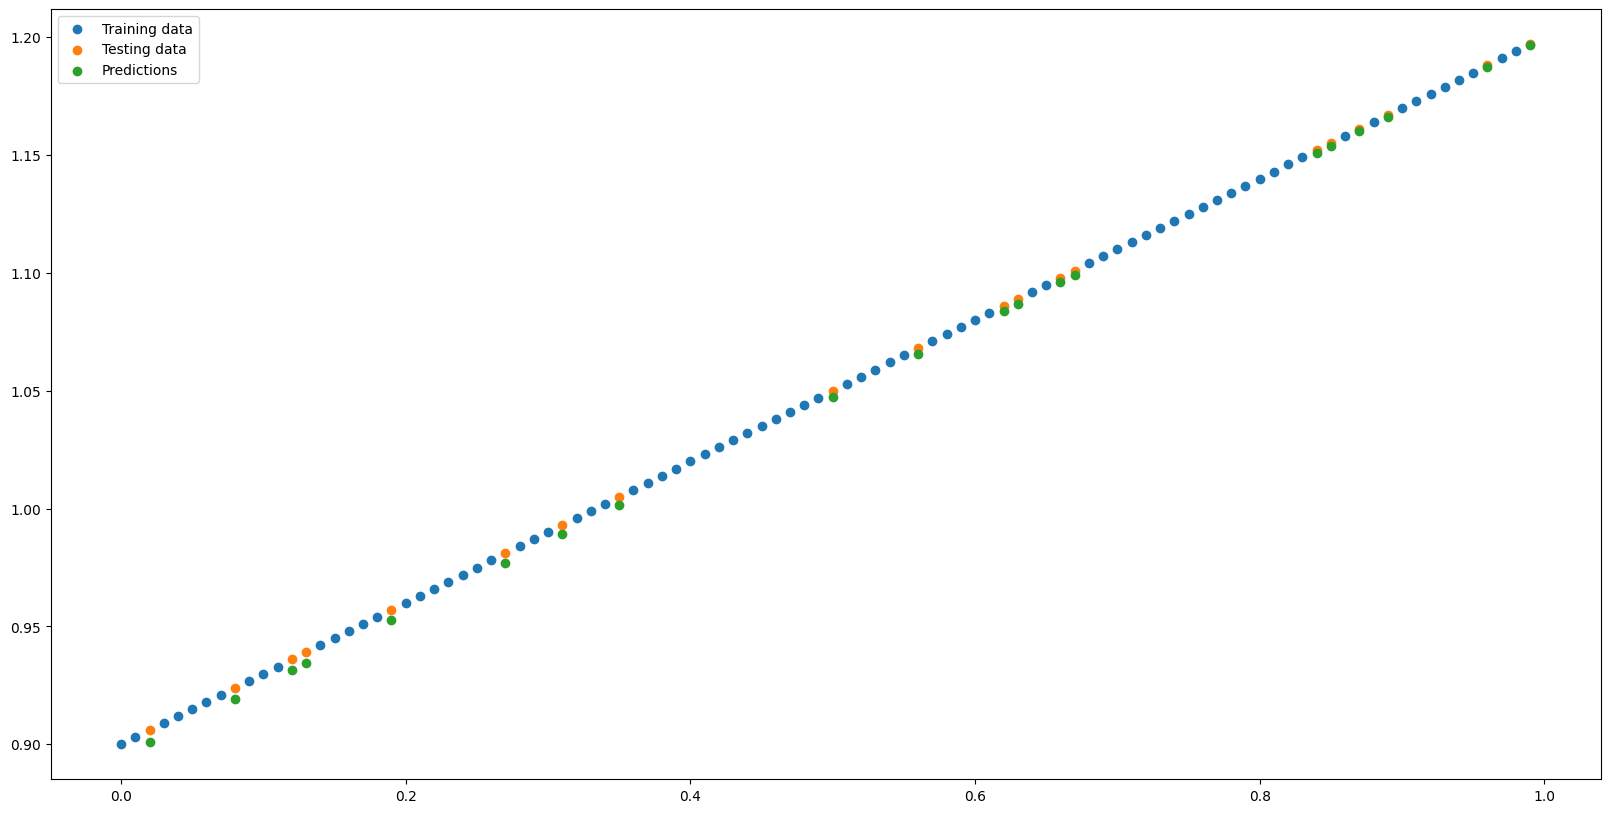

In [62]:
# Plot the predictions (these may need to be on a specific device)
plot_predictions(X_train.cpu(), y_train.cpu(), X_test.cpu(), y_test.cpu(), y_preds.cpu())

## 5. Save your trained model's `state_dict()` to file.
  * Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.
  * Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [67]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_excercises.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model saate dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(),
          f = MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_excercises.pth


In [68]:
# Create new instance of model and load saved state dict (make sure to put it on the target device)
loaded_model = LinearReg1()

# Load the saved model_1_state_dict
loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH, weights_only=True))

#Put the loaded model to device
loaded_model.to(device)

LinearReg1()

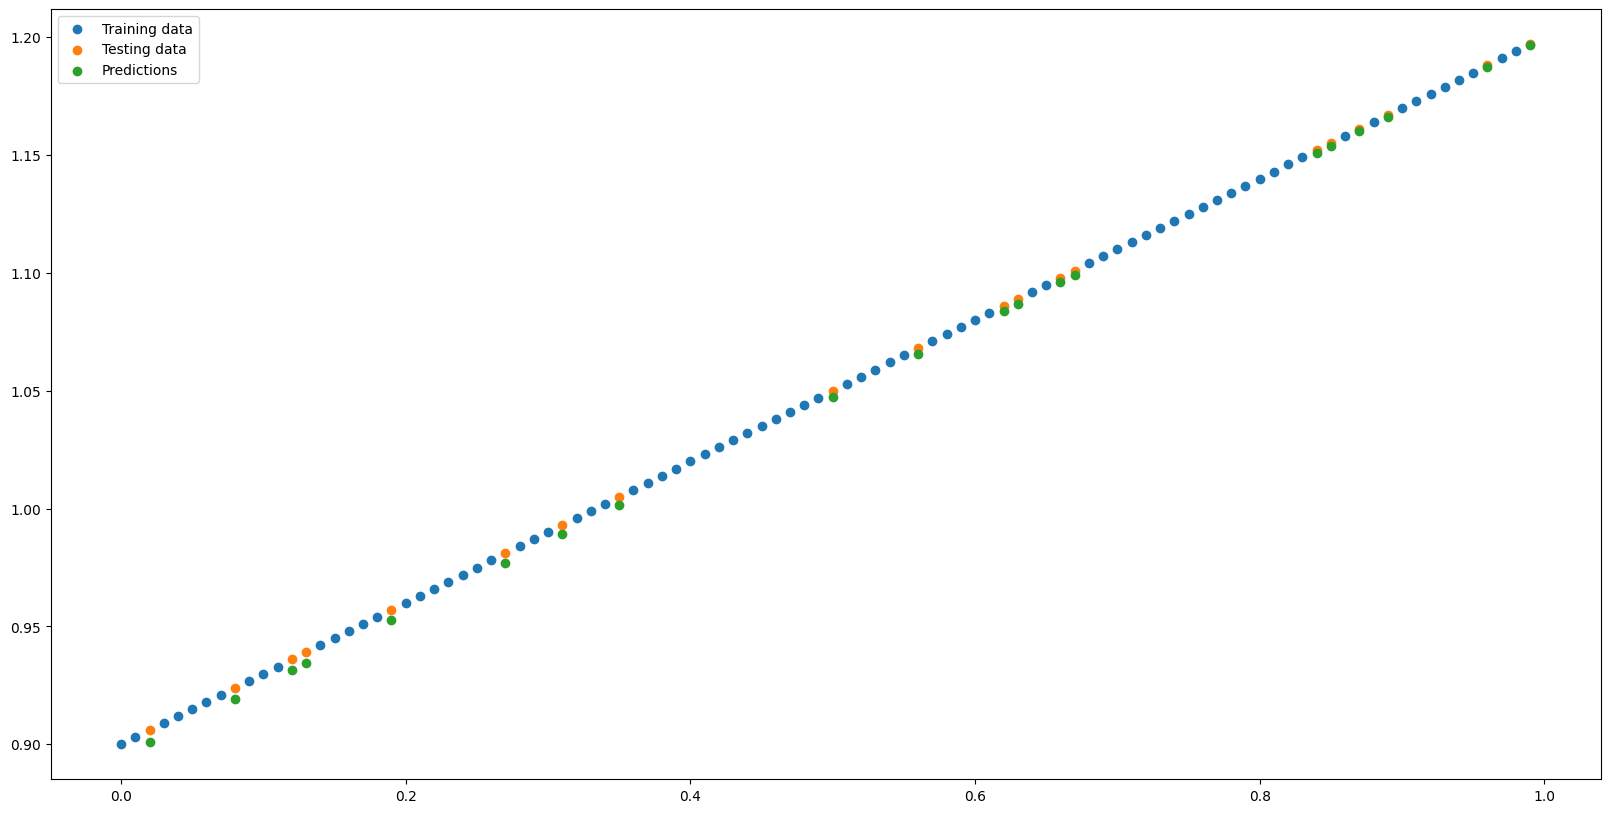

In [69]:
# Make predictions with loaded model and compare them to the previous
model.eval()

# Make predictions on the test data
with torch.inference_mode():
  y_preds = model(X_test)

# Plot the predictions (these may need to be on a specific device)
plot_predictions(X_train.cpu(), y_train.cpu(), X_test.cpu(), y_test.cpu(), y_preds.cpu())